<a href="https://colab.research.google.com/github/Putrimaesarah/STATMUL-TURF/blob/main/Copy_of_TUGAS_PRAKTEK_STATISTIKA_MULTIVARIAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktek Dasar Analisa Data Multivariat

Nama :    Putri Maesarah

Kelas :    6B

Notebook ini mencakup:
1. Analisis Deskriptif Data Multivariat
2. Uji Normalitas Multivariat
3. Visualisasi Data Multivariat
4. Deteksi Outlier

In [14]:
#Install Library
!pip install pingouin

In [15]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [16]:
#Data
df = pd.read_excel('/content/medsos.xlsx')


In [17]:
# Daftar aplikasi mobile banking
apps = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']


In [18]:
# Konversi data ke binary (Ya=1, Tidak=0)
binary_data = df[apps].apply(lambda x: x.map({'Ya': 1, 'Tidak': 0}))

In [22]:
# Analisis TURF untuk semua kemungkinan kombinasi (1-6 aplikasi)
turf_results = []

for r in range(1, len(apps)+1):
    for combo in combinations(apps, r):
        reach = calculate_reach(combo)
        turf_results.append({
            'Kombinasi': combo,
            'Jumlah Aplikasi': r,
            'Reach': reach,
            'Persentase Reach': (reach / len(df)) * 100
        })
turf_results

[{'Kombinasi': ('BCA Mobile',),
  'Jumlah Aplikasi': 1,
  'Reach': np.int64(34),
  'Persentase Reach': np.float64(68.0)},
 {'Kombinasi': ('Livin’ by Mandiri',),
  'Jumlah Aplikasi': 1,
  'Reach': np.int64(25),
  'Persentase Reach': np.float64(50.0)},
 {'Kombinasi': ('BRImo',),
  'Jumlah Aplikasi': 1,
  'Reach': np.int64(29),
  'Persentase Reach': np.float64(57.99999999999999)},
 {'Kombinasi': ('DANA',),
  'Jumlah Aplikasi': 1,
  'Reach': np.int64(25),
  'Persentase Reach': np.float64(50.0)},
 {'Kombinasi': ('OVO',),
  'Jumlah Aplikasi': 1,
  'Reach': np.int64(20),
  'Persentase Reach': np.float64(40.0)},
 {'Kombinasi': ('GoPay',),
  'Jumlah Aplikasi': 1,
  'Reach': np.int64(30),
  'Persentase Reach': np.float64(60.0)},
 {'Kombinasi': ('BCA Mobile', 'Livin’ by Mandiri'),
  'Jumlah Aplikasi': 2,
  'Reach': np.int64(46),
  'Persentase Reach': np.float64(92.0)},
 {'Kombinasi': ('BCA Mobile', 'BRImo'),
  'Jumlah Aplikasi': 2,
  'Reach': np.int64(43),
  'Persentase Reach': np.float64(86.0)},

<ipython-input-19-418bdd51482a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=optimal_combinations, x='Jumlah Aplikasi', y='Persentase Reach', palette='viridis')


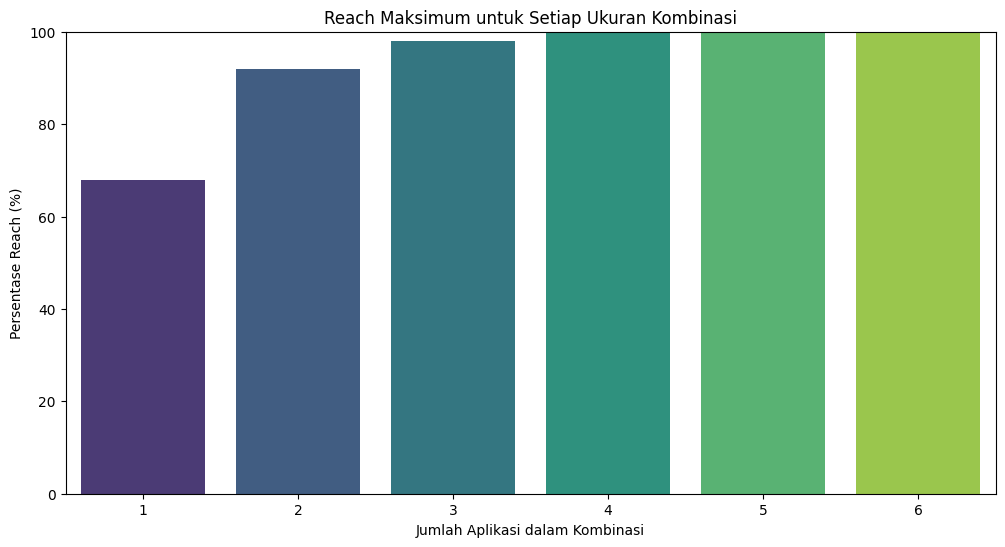

Kombinasi Optimal untuk Setiap Ukuran:

1 Aplikasi:
- Kombinasi: BCA Mobile
- Reach: 34 orang (68.0%)

2 Aplikasi:
- Kombinasi: BCA Mobile, Livin’ by Mandiri
- Reach: 46 orang (92.0%)

3 Aplikasi:
- Kombinasi: BCA Mobile, Livin’ by Mandiri, BRImo
- Reach: 49 orang (98.0%)

4 Aplikasi:
- Kombinasi: BCA Mobile, Livin’ by Mandiri, BRImo, OVO
- Reach: 50 orang (100.0%)

5 Aplikasi:
- Kombinasi: BCA Mobile, Livin’ by Mandiri, BRImo, DANA, OVO
- Reach: 50 orang (100.0%)

6 Aplikasi:
- Kombinasi: BCA Mobile, Livin’ by Mandiri, BRImo, DANA, OVO, GoPay
- Reach: 50 orang (100.0%)

Distribusi Jumlah Aplikasi per Responden:
2    13
3    17
4    15
5     4
6     1
Name: count, dtype: int64


In [19]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data
df = pd.read_excel('/content/medsos.xlsx')

# Daftar aplikasi mobile banking
apps = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Konversi data ke binary (Ya=1, Tidak=0)
binary_data = df[apps].apply(lambda x: x.map({'Ya': 1, 'Tidak': 0}))

# Fungsi untuk menghitung reach kombinasi
def calculate_reach(combination):
    return binary_data[list(combination)].max(axis=1).sum()

# Analisis TURF untuk semua kemungkinan kombinasi (1-6 aplikasi)
turf_results = []

for r in range(1, len(apps)+1):
    for combo in combinations(apps, r):
        reach = calculate_reach(combo)
        turf_results.append({
            'Kombinasi': combo,
            'Jumlah Aplikasi': r,
            'Reach': reach,
            'Persentase Reach': (reach / len(df)) * 100
        })

# Konversi ke DataFrame
turf_df = pd.DataFrame(turf_results)

# Menemukan kombinasi optimal untuk setiap ukuran kombinasi
optimal_combinations = turf_df.loc[turf_df.groupby('Jumlah Aplikasi')['Reach'].idxmax()]

# Visualisasi hasil
plt.figure(figsize=(12, 6))
sns.barplot(data=optimal_combinations, x='Jumlah Aplikasi', y='Persentase Reach', palette='viridis')
plt.title('Reach Maksimum untuk Setiap Ukuran Kombinasi')
plt.ylabel('Persentase Reach (%)')
plt.xlabel('Jumlah Aplikasi dalam Kombinasi')
plt.ylim(0, 100)
plt.show()

# Menampilkan hasil optimal
print("Kombinasi Optimal untuk Setiap Ukuran:")
for _, row in optimal_combinations.iterrows():
    print(f"\n{row['Jumlah Aplikasi']} Aplikasi:")
    print(f"- Kombinasi: {', '.join(row['Kombinasi'])}")
    print(f"- Reach: {row['Reach']} orang ({row['Persentase Reach']:.1f}%)")

# Analisis frekuensi (berapa banyak aplikasi yang digunakan responden)
app_counts = binary_data.sum(axis=1)
print("\nDistribusi Jumlah Aplikasi per Responden:")
print(app_counts.value_counts().sort_index())

## 1. Analisis Deskriptif Data Multivariat

### Vektor Rata-rata

### Matriks Korelasi

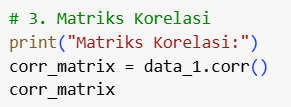

In [20]:
# 3. Matriks Korelasi
print("Matriks Korelasi:")
corr_matrix = data_1.corr()
corr_matrix

Matriks Korelasi:


ValueError: could not convert string to float: 'Irfan Fauzi'

### Korelasi Parsial
Korelasi Parsial adalah korelasi antar 2 variabel dengan mengabaikan variabel lainnya.  Misalnya korelasi parsial antara variabel X dan Y, dengan mengontrol variabel Z, maka:

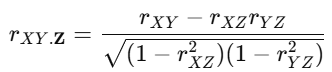

Jika ada lebih dari 3 variabel, maka matriks korelasi parsialnya dapat dibentuk dari rumus invers sebagai berikut :

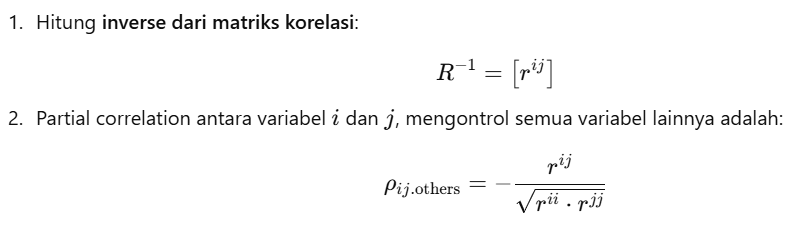

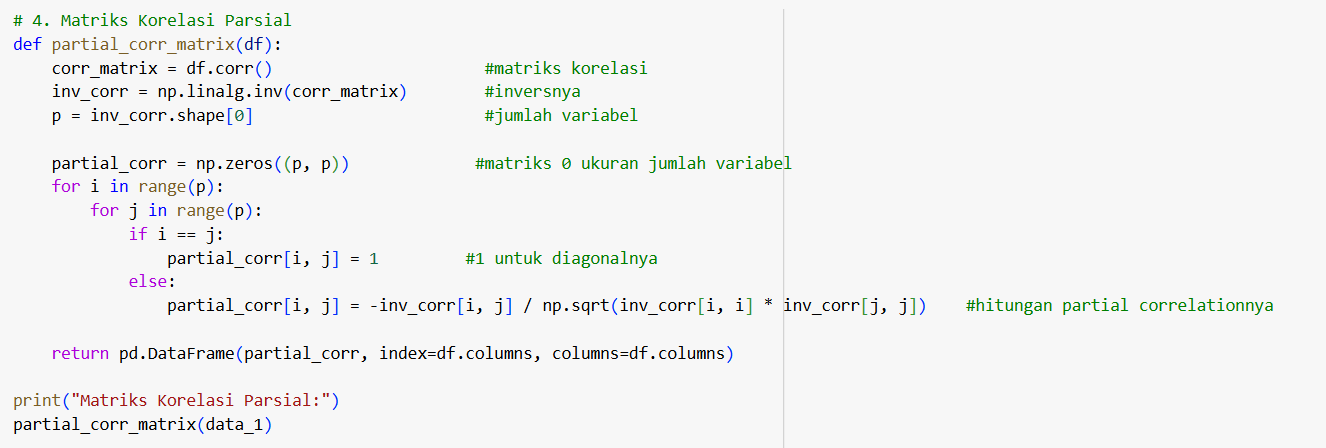

In [ ]:
# 4. Matriks Korelasi Parsial
def partial_corr_matrix(df):
    corr_matrix = df.corr()                      #matriks korelasi
    inv_corr = np.linalg.inv(corr_matrix)         #inversnya
    p = inv_corr.shape[0]                        #jumlah variabel

    partial_corr = np.zeros((p, p))             #matriks 0 ukuran jumlah variabel
    for i in range(p):
        for j in range(p):
            if i == j:
                partial_corr[i, j] = 1         #1 untuk diagonalnya
            else:
                partial_corr[i, j] = -inv_corr[i, j] / np.sqrt(inv_corr[i, i] * inv_corr[j, j])    #hitungan partial correlationnya

    return pd.DataFrame(partial_corr, index=df.columns, columns=df.columns)

print("Matriks Korelasi Parsial:")
partial_corr_matrix(data_1)


## 2. Uji Normalitas Multivariat

Secara umum ada 2 cara uji normalitas multivariat:

1. Uji Henze-Zirkler
2. Uji Histogram & Mardia (seperti uji skewness & kurtosis)

Ho : Data berdistribusi normal multivariat

H1 : Data tidak berdistribusi normal multivariat

### a. Uji Henze-Zirkler

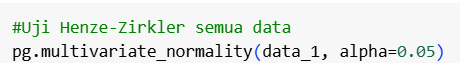

In [ ]:
#Uji Henze-Zirkler semua data
pg.multivariate_normality(data_1, alpha=0.05)

pvalue<0.05, Ho ditolak

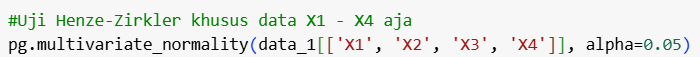

In [ ]:
#Uji Henze-Zirkler khusus data X1 - X4 aja
pg.multivariate_normality(data_1[['X1', 'X2', 'X3', 'X4']], alpha=0.05)

pvalue>=0.05, Ho diterima, data berdistribusi normal multivariat

### b. Uji Histogram & Mardia

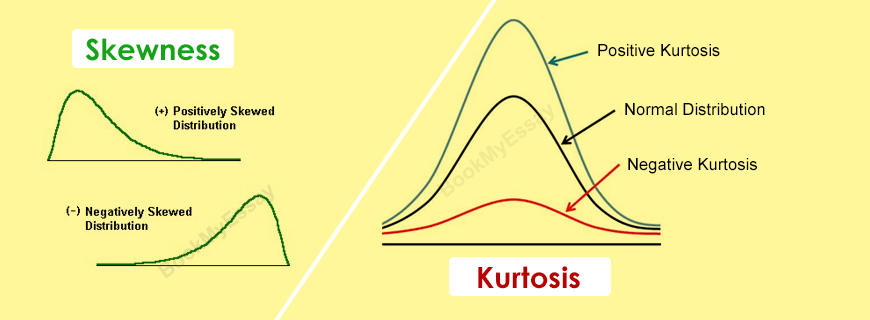

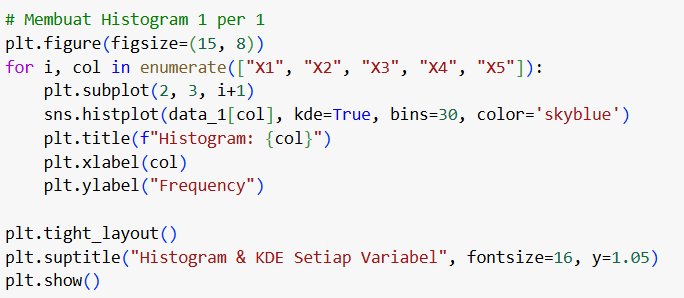

In [ ]:
# Membuat Histogram 1 per 1
plt.figure(figsize=(15, 8))
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5']):
  plt.subplot(2, 3, i+1)
  sns.histplot(data_1[col], kde=True, bins=30, color='skyblue')
  plt.title(f"Histogram: {col}")
  plt.xlabel(col)
  plt.ylabel("frequency")

plt.tight_layout()
plt.suptitle("Histogram & KDE Setiap Variabel", fontsize=16, y=1.05)
plt.show()


Data tidak berdistribusi normal multivariat karena ada data X5 tidak berdistribusi normal

## 3. Deteksi Outlier multivariat dengan Mahalanobis Distance

### Step 1: Mahalanobis Distance

**Mahalanobis Distance** adalah ukuran jarak antar titik ke pusat distribusi (mean), dengan mempertimbangkan variansi dan korelasi antar variabel.

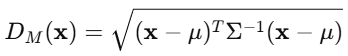


Ciri Mahalanobis distance:

1. Mengoreksi skala antar variabel

2. Memperhitungkan korelasi antar variabel

Berbeda dengan Euclidean distance yang mengasumsikan fitur saling independen dan sama skala

In [ ]:
mean_vec = data_1.mean().values                        #mean
cov_matrix = data_1.cov()                              #covarian
inv_cov_matrix = np.linalg.inv(cov_matrix)             #invers covarian

# Mahalanobis Distance function
def mahalanobis_dist(x, mean, inv_cov):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff.T, inv_cov), diff))

# Hitung Mahalanobis Distance untuk semua observasi

mahal_distances = np.array([mahalanobis_dist(x, mean_vec, inv_cov_matrix) for x in data_1.values])

print("ukuran = ", mahal_distances.shape)
mahal_distances

Semakin besar angka Mahalanobis Distance, artinya data semakin jauh dari pusat distribusi, mirip seperti "z-score" di data univariat.



### Step 2 : Deteksi Outlier dengan membandingkan angka di tabel Chi-Square



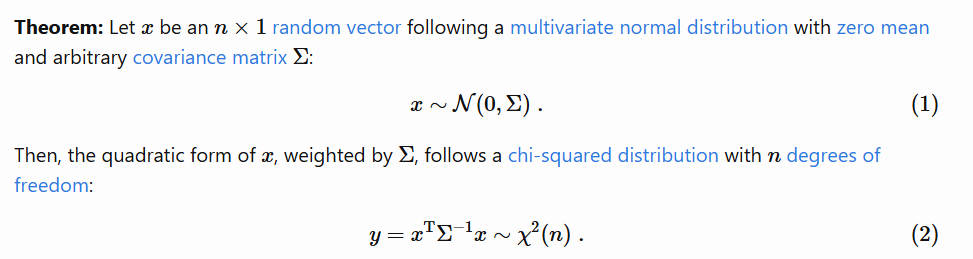

Jika di data univariat kita bisa deteksi outlier dengan membandingkan skor z-score dan nilai z-value di tabel distribusi normal, maka di multivariat kita bisa bandingkan kuadrat mahalanobis distance dengan nilai di tabel chi-square

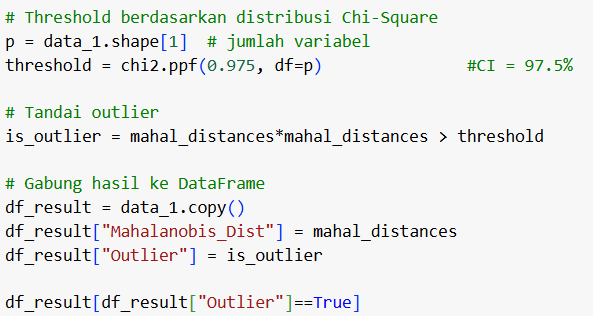

In [ ]:
# Threshold berdasarkan distribusi Chi-Square
p = data_1.shape[1]
threshold = chi2.ppf(0.975, df=p)

#Tandai outlier
is_outlier = mahal_distances*mahal_distances > threshold

#Gabung hasil ke DataFrame
df_result = data_1.copy()
df_result["Mahalanobis_Dist"] = mahal_distances
df_result["Outlier"] = is_outlier

df_result[df_result["Outlier"]==True]

## 4. Total Unduplicated Reach and Frequency (TURF)

Total Unduplicated Reach and Frequency (TURF) adalah analisis menentukan kombinasi produk, fitur, atau treatment lainnya yang menjangkau reach terbanyak. Beberapa istilah :


*   Incremental reach : persentase tambahan frekuensi (frekuensi yang pilih item tersebut tapi tidak pilih item sebelumnya)
*   Total reach : persentase kumulatif



Contoh kasus :
Misalkan dari sejumlah survey, 400 respondent ini mengenali produk skincare perusahaan A dari 100 lokasi iklan berikut (yang terkode 1).


In [57]:
import pandas as pd

url = 'https://github.com/Putrimaesarah/STATMUL-TURF/commit/8db35304cb32c30042be927028510c1ed1e70c9d#diff-de866b8e2ae657a2645a7878d6cc8cfd4f79ed10f5b0f4e3e74c862de6a63021'

df = pd.read_csv(url)

df.head()  # menampilkan 5 baris pertama


ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 61


In [23]:
data = pd.read_excel("/content/medsos.xlsx")
data.head()

,Nama,Jenis Kelamin,BCA Mobile,Livin’ by Mandiri,BRImo,DANA,OVO,GoPay
0,Irfan Fauzi,Perempuan,Ya,Tidak,Ya,Tidak,Tidak,Tidak
1,Lina Baskara,Perempuan,Ya,Tidak,Ya,Ya,Ya,Ya
2,Gita Dewi,Laki-laki,Tidak,Tidak,Tidak,Tidak,Ya,Ya
3,Hana Juwita,Perempuan,Ya,Ya,Ya,Tidak,Tidak,Ya
4,Qori Gunawan,Perempuan,Tidak,Ya,Ya,Ya,Tidak,Ya


In [31]:
import pandas as pd

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

for service in services:
    if service in df.columns:
        # Asumsi isinya "Ya" atau "Tidak", ubah ke 1/0 dulu
        if df[service].dtype == 'object':
            df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})
        total_users = df[service].sum()
        print(f"Jumlah pengguna {service}: {total_users}")
    else:
        print(f"Kolom {service} tidak ditemukan.")


Jumlah pengguna BCA Mobile: 34
Jumlah pengguna Livin’ by Mandiri: 25
Jumlah pengguna BRImo: 29
Jumlah pengguna DANA: 25
Jumlah pengguna OVO: 20
Jumlah pengguna GoPay: 30


<ipython-input-31-8f89c36f7ca9>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})


In [33]:
import pandas as pd

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Ubah kolom layanan ke 1/0 kalau isinya 'Ya'/'Tidak'
for service in services:
    if service in df.columns and df[service].dtype == 'object':
        df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})

df_laki = df[df['Jenis Kelamin'] == 'Laki-laki']
df_wanita = df[df['Jenis Kelamin'] == 'Perempuan']

print("Jumlah pengguna layanan berdasarkan jenis kelamin:")

for service in services:
    laki_count = df_laki[service].sum()
    wanita_count = df_wanita[service].sum()
    print(f"Laki-laki {service}: {laki_count}")
    print(f"Perempuan {service}: {wanita_count}")


Jumlah pengguna layanan berdasarkan jenis kelamin:
Laki-laki BCA Mobile: 13
Perempuan BCA Mobile: 21
Laki-laki Livin’ by Mandiri: 13
Perempuan Livin’ by Mandiri: 12
Laki-laki BRImo: 16
Perempuan BRImo: 13
Laki-laki DANA: 13
Perempuan DANA: 12
Laki-laki OVO: 11
Perempuan OVO: 9
Laki-laki GoPay: 14
Perempuan GoPay: 16


<ipython-input-33-0848d2f7f572>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})


<ipython-input-52-496ad4ab68f1>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})


Jumlah pengguna layanan berdasarkan jenis kelamin:
Laki-laki: {'BCA Mobile': np.int64(13), 'Livin’ by Mandiri': np.int64(13), 'BRImo': np.int64(16), 'DANA': np.int64(13), 'OVO': np.int64(11), 'GoPay': np.int64(14)}
Perempuan: {'BCA Mobile': np.int64(21), 'Livin’ by Mandiri': np.int64(12), 'BRImo': np.int64(13), 'DANA': np.int64(12), 'OVO': np.int64(9), 'GoPay': np.int64(16)}


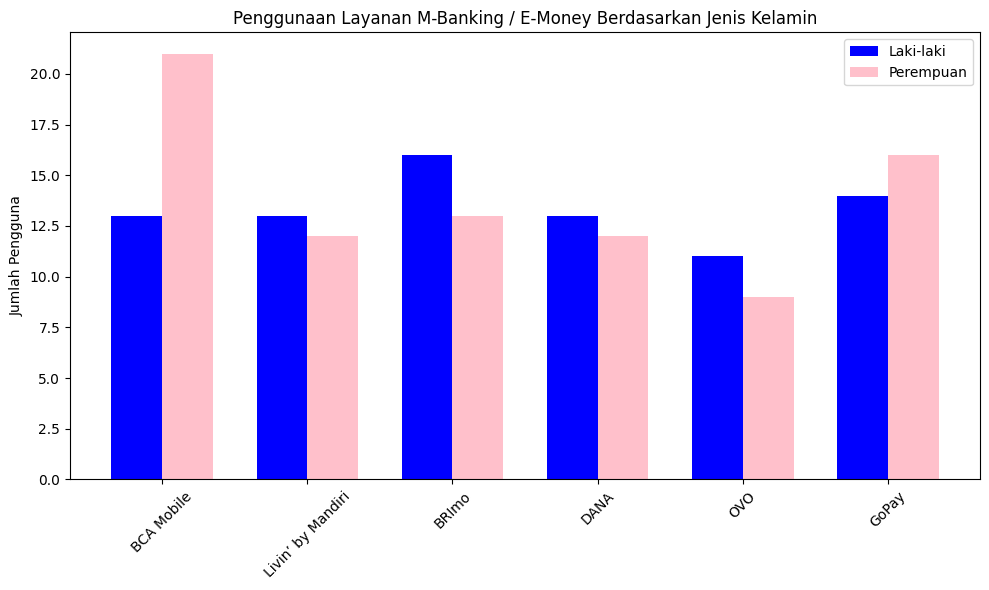

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Ubah kolom layanan ke 1/0 kalau isinya 'Ya'/'Tidak'
for service in services:
    if service in df.columns and df[service].dtype == 'object':
        df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})

# Pisah data laki-laki dan wanita
df_laki = df[df['Jenis Kelamin'] == 'Laki-laki']
df_wanita = df[df['Jenis Kelamin'] == 'Perempuan']

# Hitung jumlah pengguna tiap layanan untuk laki-laki dan wanita
count_laki = {service: df_laki[service].sum() for service in services}
count_wanita = {service: df_wanita[service].sum() for service in services}

print("Jumlah pengguna layanan berdasarkan jenis kelamin:")
print("Laki-laki:", count_laki)
print("Perempuan:", count_wanita)

# Visualisasi
labels = services
laki_values = [count_laki[s] for s in services]
wanita_values = [count_wanita[s] for s in services]

x = range(len(services))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, laki_values, width=width, label='Laki-laki', color='blue')
plt.bar([i + width for i in x], wanita_values, width=width, label='Perempuan', color='pink')

plt.xticks([i + width/2 for i in x], labels, rotation=45)
plt.ylabel('Jumlah Pengguna')
plt.title('Penggunaan Layanan M-Banking / E-Money Berdasarkan Jenis Kelamin')
plt.legend()
plt.tight_layout()
plt.show()



<ipython-input-34-32bb28ee2989>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})


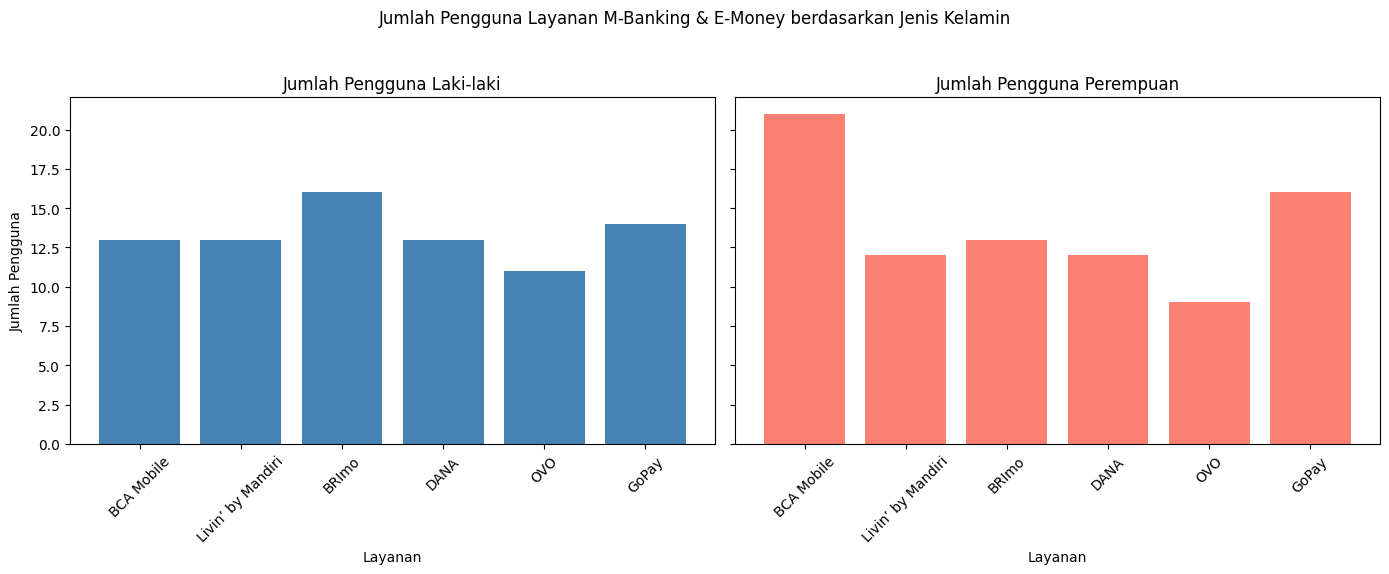

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Konversi 'Ya'/'Tidak' ke 1/0
for service in services:
    if service in df.columns and df[service].dtype == 'object':
        df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})

# Filter per jenis kelamin
df_laki = df[df['Jenis Kelamin'].str.lower() == 'laki-laki']
df_wanita = df[df['Jenis Kelamin'].str.lower() == 'perempuan']

# Hitung jumlah pengguna tiap layanan
count_laki = [df_laki[service].sum() for service in services]
count_wanita = [df_wanita[service].sum() for service in services]

# Buat figure dengan 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Bar chart laki-laki
axes[0].bar(services, count_laki, color='steelblue')
axes[0].set_title('Jumlah Pengguna Laki-laki')
axes[0].set_xlabel('Layanan')
axes[0].set_ylabel('Jumlah Pengguna')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart perempuan
axes[1].bar(services, count_wanita, color='salmon')
axes[1].set_title('Jumlah Pengguna Perempuan')
axes[1].set_xlabel('Layanan')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Jumlah Pengguna Layanan M-Banking & E-Money berdasarkan Jenis Kelamin')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [37]:
import pandas as pd
from itertools import combinations

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Konversi 'Ya'/'Tidak' ke 1/0
for service in services:
    if service in df.columns and df[service].dtype == 'object':
        df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})

# Hitung kombinasi 2 layanan
comb_counts = {}

for combo in combinations(services, 2):
    # Hitung baris yang punya 1 di kedua layanan tersebut
    count = df[(df[combo[0]] == 1) & (df[combo[1]] == 1)].shape[0]
    comb_counts[combo] = count

# Sort kombinasi berdasarkan jumlah pengguna terbanyak
sorted_combs = sorted(comb_counts.items(), key=lambda x: x[1], reverse=True)

print("Top kombinasi 2 layanan yang paling banyak digunakan bersama:")

for combo, count in sorted_combs:
    print(f"{combo[0]} + {combo[1]} = {count} pengguna")


Top kombinasi 2 layanan yang paling banyak digunakan bersama:
BCA Mobile + BRImo = 20 pengguna
BCA Mobile + GoPay = 19 pengguna
Livin’ by Mandiri + GoPay = 17 pengguna
BRImo + DANA = 17 pengguna
BCA Mobile + DANA = 16 pengguna
BRImo + GoPay = 15 pengguna
BCA Mobile + OVO = 14 pengguna
Livin’ by Mandiri + BRImo = 14 pengguna
DANA + GoPay = 14 pengguna
BCA Mobile + Livin’ by Mandiri = 13 pengguna
Livin’ by Mandiri + DANA = 11 pengguna
BRImo + OVO = 11 pengguna
OVO + GoPay = 11 pengguna
Livin’ by Mandiri + OVO = 9 pengguna
DANA + OVO = 8 pengguna


<ipython-input-37-3a973d15be71>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})


In [44]:
!pip install squarify

In [38]:
import pandas as pd
from itertools import combinations

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Konversi 'Ya'/'Tidak' ke 1/0
for service in services:
    if service in df.columns and df[service].dtype == 'object':
        df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})

combination_counts = {}

# Hitung untuk semua kombinasi ukuran 1 sampai len(services)
for r in range(1, len(services)+1):
    for combo in combinations(services, r):
        # Cari baris yang pakai semua layanan di combo
        count = df[list(combo)].all(axis=1).sum()
        combination_counts[combo] = count

# Sort kombinasi berdasarkan jumlah pengguna terbanyak
sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

print("Kombinasi layanan (dari 1 sampai semua) yang paling banyak digunakan:")

for combo, count in sorted_combinations:
    layanan_str = " + ".join(combo)
    print(f"{layanan_str}: {count} pengguna")


Kombinasi layanan (dari 1 sampai semua) yang paling banyak digunakan:
BCA Mobile: 34 pengguna
GoPay: 30 pengguna
BRImo: 29 pengguna
Livin’ by Mandiri: 25 pengguna
DANA: 25 pengguna
OVO: 20 pengguna
BCA Mobile + BRImo: 20 pengguna
BCA Mobile + GoPay: 19 pengguna
Livin’ by Mandiri + GoPay: 17 pengguna
BRImo + DANA: 17 pengguna
BCA Mobile + DANA: 16 pengguna
BRImo + GoPay: 15 pengguna
BCA Mobile + OVO: 14 pengguna
Livin’ by Mandiri + BRImo: 14 pengguna
DANA + GoPay: 14 pengguna
BCA Mobile + Livin’ by Mandiri: 13 pengguna
Livin’ by Mandiri + DANA: 11 pengguna
BRImo + OVO: 11 pengguna
OVO + GoPay: 11 pengguna
BCA Mobile + BRImo + DANA: 11 pengguna
BCA Mobile + BRImo + GoPay: 10 pengguna
BRImo + DANA + GoPay: 10 pengguna
Livin’ by Mandiri + OVO: 9 pengguna
BCA Mobile + DANA + GoPay: 9 pengguna
DANA + OVO: 8 pengguna
BCA Mobile + Livin’ by Mandiri + BRImo: 8 pengguna
BCA Mobile + Livin’ by Mandiri + GoPay: 8 pengguna
BCA Mobile + BRImo + OVO: 8 pengguna
Livin’ by Mandiri + BRImo + DANA: 8 pen

<ipython-input-38-ac31d8d08878>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})


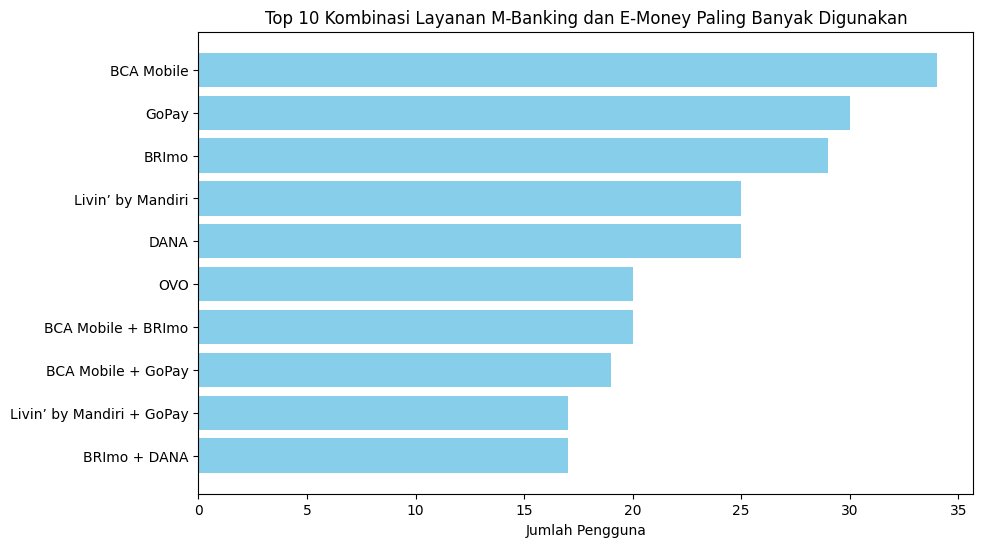

In [49]:
import matplotlib.pyplot as plt
import squarify  # pip install squarify


# Misal sudah ada hasil kombinasi dan jumlahnya, kita ambil top 10 kombinasi terbanyak:
top_n = 10
sorted_combos = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

labels = [" + ".join(combo) for combo, count in sorted_combos]
counts = [count for combo, count in sorted_combos]

# Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Jumlah Pengguna")
plt.title(f"Top {top_n} Kombinasi Layanan M-Banking dan E-Money Paling Banyak Digunakan")
plt.gca().invert_yaxis()  # Kombinasi terbanyak di atas
plt.show()



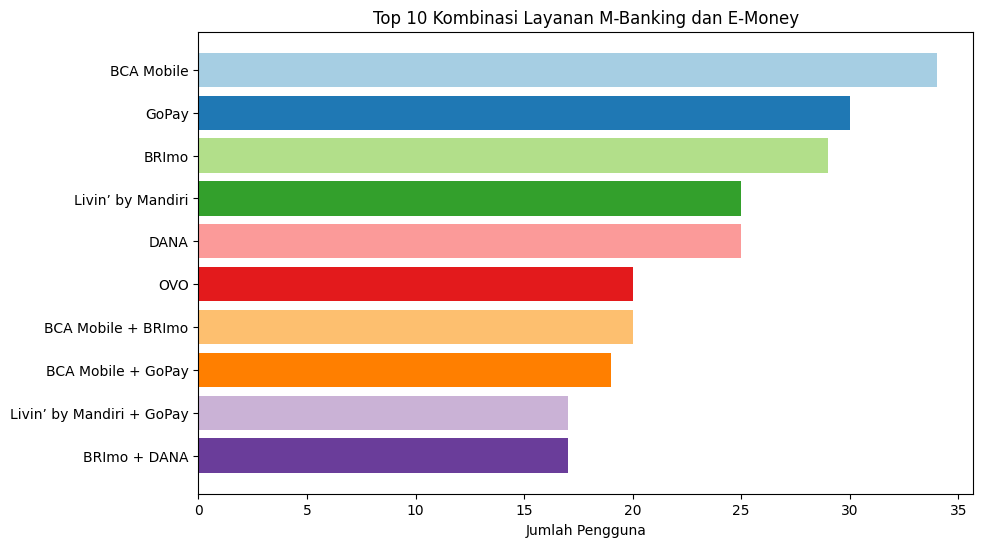

In [48]:
colors = plt.cm.Paired.colors  # Palet warna berbeda
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, counts, color=colors[:top_n])
plt.xlabel("Jumlah Pengguna")
plt.title(f"Top {top_n} Kombinasi Layanan M-Banking dan E-Money")
plt.gca().invert_yaxis()
plt.show()


In [53]:
import pandas as pd
from itertools import combinations

# Misal df adalah DataFrame kamu, dengan kolom layanan:
services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Ubah kolom layanan jadi biner (1 = pakai, 0 = tidak)
for service in services:
    df[service] = df[service].replace({'Ya':1, 'Tidak':0})

# Hitung frekuensi kombinasi layanan dari 1 sampai 6 layanan
combo_counts = {}

for r in range(1, len(services)+1):
    for combo in combinations(services, r):
        # Hitung berapa baris yang pakai semua layanan di combo ini
        mask = df[list(combo)].all(axis=1)
        count = mask.sum()
        if count > 0:
            combo_counts[combo] = count

# Urutkan kombinasi berdasarkan jumlah pengguna, descending
sorted_combos = sorted(combo_counts.items(), key=lambda x: x[1], reverse=True)

# Tampilkan top 10 kombinasi
print("Top 10 kombinasi layanan yang paling banyak digunakan:")
for combo, count in sorted_combos[:10]:
    print(f"{' + '.join(combo)}: {count} pengguna")


Top 10 kombinasi layanan yang paling banyak digunakan:
BCA Mobile: 34 pengguna
GoPay: 30 pengguna
BRImo: 29 pengguna
Livin’ by Mandiri: 25 pengguna
DANA: 25 pengguna
OVO: 20 pengguna
BCA Mobile + BRImo: 20 pengguna
BCA Mobile + GoPay: 19 pengguna
Livin’ by Mandiri + GoPay: 17 pengguna
BRImo + DANA: 17 pengguna


In [54]:
import pandas as pd
from itertools import combinations

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Ubah kolom layanan jadi biner
for service in services:
    df[service] = df[service].replace({'Ya': 1, 'Tidak': 0})

combo_counts = {}

# Mulai dari kombinasi 2 layanan sampai semua layanan
for r in range(2, len(services)+1):
    for combo in combinations(services, r):
        mask = df[list(combo)].all(axis=1)
        count = mask.sum()
        if count > 0:
            combo_counts[combo] = count

sorted_combos = sorted(combo_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 10 kombinasi layanan (minimal 2 layanan) paling banyak digunakan:")
for combo, count in sorted_combos[:10]:
    print(f"{' + '.join(combo)}: {count} pengguna")


Top 10 kombinasi layanan (minimal 2 layanan) paling banyak digunakan:
BCA Mobile + BRImo: 20 pengguna
BCA Mobile + GoPay: 19 pengguna
Livin’ by Mandiri + GoPay: 17 pengguna
BRImo + DANA: 17 pengguna
BCA Mobile + DANA: 16 pengguna
BRImo + GoPay: 15 pengguna
BCA Mobile + OVO: 14 pengguna
Livin’ by Mandiri + BRImo: 14 pengguna
DANA + GoPay: 14 pengguna
BCA Mobile + Livin’ by Mandiri: 13 pengguna


Jika perusahaan A ingin mengeluarkan produk baru, berapa jumlah spanduk dan lokasi optimal agar dapat menjangkau target jumlah customer yang diinginkan? Bagaimana pula jika target mereka adalah pengendara motor?


In [25]:
# @title Reach vs. Jumlah Iklan
data = "/content/medsos.xlsx" #@param {type:"string"}
M-Banking = 'BCA Mobile' # @param ["All", "BCA Mobile", "Livin’ by Mandiri", "BRImo", "DANA", "OVO", "GoPay"]
Target_dalam_persen = 80 # @param

data_used = pd.read_excel(data)
if M-Banking != 'All':
  data_used = data_used[data_used['Kendaraan']==Kendaraan] #Filter kendaraan

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("Lokasi 1")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jumlah Lokasi iklan")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Reach vs. Jumlah Iklan")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_ads.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} OOH.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n Lokasi iklan agar mencapai target :", selected_items[:len(selected_items)])  # Menampilkan lokasi iklan agar optimal


SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<ipython-input-25-8ebafd9d4cb5>, line 3)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Input Parameter ---
data_path = "/content/medsos.xlsx"  # Path file data kamu
selected_service = 'BCA Mobile'     # Pilih: All / BCA Mobile / Livin’ by Mandiri / BRImo / DANA / OVO / GoPay
target_reach_pct = 80               # Target reach minimal (%) dalam persen

# --- Load Data ---
data_used = pd.read_excel(data_path)

# Pastikan kolom layanan ada, sesuaikan jika nama kolom beda
# Misal kolom layanan: 'Layanan', ganti sesuai data kamu
if selected_service != 'All':
    data_used = data_used[data_used['Layanan'] == selected_service]

if len(data_used) == 0:
    raise SystemExit("Data kosong setelah filter layanan, hentikan program.")

# --- Konversi data preferensi ke biner jika masih "Ya"/"Tidak" ---
# Misal kolom mulai dari 'Lokasi 1' sampai akhir adalah pilihan lokasi iklan
start_col_index = data_used.columns.get_loc("Lokasi 1")

# Cek apakah datanya sudah biner (0/1) atau "Ya"/"Tidak"
# Jika string "Ya"/"Tidak", lakukan replace
sample_value = data_used.iloc[0, start_col_index]
if isinstance(sample_value, str):
    data_used.iloc[:, start_col_index:] = data_used.iloc[:, start_col_index:].replace({'Ya':1, 'Tidak':0})

# --- Hitung reach per lokasi iklan (jumlah responden yang menjangkau lokasi itu) ---
reach_per_item = data_used[data_used.columns[start_col_index:]].sum(axis=0).sort_values(ascending=False)

# --- Algoritma Greedy untuk kombinasi optimal mencapai target reach ---
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))

    if len(new_reach) >= target_reach_pct / 100 * len(data_used):
        break
    current_reach = new_reach

# --- Hitung incremental reach untuk bar chart bertingkat ---
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]

# --- Visualisasi reach vs jumlah lokasi iklan ---
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(f"{i+1}", inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100

plt.axhline(y=target_reach_pct, color='r', linestyle='--', label=f'Target {target_reach_pct}%')

plt.xlabel("Jumlah Lokasi Iklan")
plt.ylabel("Total Reach (%)")
plt.title(f"TURF Analysis: Reach vs Jumlah Iklan ({selected_service})")
plt.legend()
plt.grid(True)
plt.show()

# --- Output hasil ---
max_reach = reach_progress[-1] if reach_progress else 0

if max_reach * 100 >= target_reach_pct:
    print(f"Untuk mencapai minimal {target_reach_pct}%, perlu {len(selected_items)} lokasi iklan.")
else:
    print(f"Tidak dapat mencapai {target_reach_pct}%. Maksimal hanya {max_reach*100:.2f}%, dengan {len(selected_items)} lokasi iklan.")

print("\nLokasi iklan agar mencapai target:")
for idx, item in enumerate(selected_items, 1):
    print(f"{idx}. {item}")


KeyError: 'Layanan'

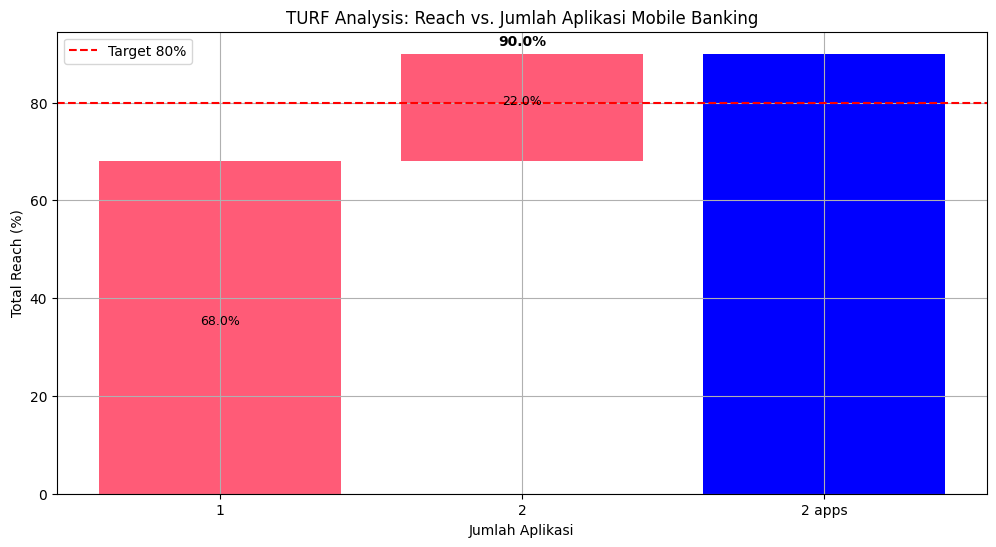

Untuk mencapai minimal 80%, perlu 2 aplikasi.

Aplikasi yang dipilih secara berurutan untuk reach optimal:
1. BCA Mobile
2. GoPay


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data
data_used = pd.read_excel('medsos.xlsx')

# Parameter input (sesuai dengan data aplikasi mobile banking)
Kendaraan = 'All'  # Tidak relevan untuk data ini, bisa diabaikan
Target_dalam_persen = 80  # Target reach yang diinginkan

# Filter data (jika diperlukan)
if Kendaraan != 'All':
    data_used = data_used[data_used['Kendaraan'] == Kendaraan]  # Tidak berlaku untuk data ini

if len(data_used) == 0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen / 100
target_reach = int(target_reach_pct * len(data_used))

# Daftar aplikasi mobile banking
apps = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

# Konversi ke binary (Ya=1, Tidak=0)
binary_data = data_used[apps].apply(lambda x: x.map({'Ya': 1, 'Tidak': 0}))

# Hitung reach per aplikasi
reach_per_item = binary_data.sum(axis=0).sort_values(ascending=False)

# Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:
    users_with_app = set(binary_data.index[binary_data[item] == 1])
    new_reach = current_reach.union(users_with_app)

    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))

    if len(new_reach) >= target_reach:
        break

    current_reach = new_reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]

# Visualisasi
plt.figure(figsize=(12, 6))
bottoms = 0

for i, inc in enumerate(incrementals):
    plt.bar(f"{i+1}", inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100

plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')

# Bar terakhir
plt.bar(f"{len(selected_items)} apps", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items)-1, reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

# Label dan judul
plt.xlabel("Jumlah Aplikasi")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Reach vs. Jumlah Aplikasi Mobile Banking")
plt.legend()
plt.grid(True)
plt.show()

# Output hasil
max_reach = max(reach_progress)

if max_reach >= target_reach_pct:
    print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} aplikasi.")
else:
    print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
    print(f"Maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} aplikasi")

print("\nAplikasi yang dipilih secara berurutan untuk reach optimal:")
for i, app in enumerate(selected_items, 1):
    print(f"{i}. {app}")

# Tugas Praktek
1. Hapus data outlier di data_1, lalu lakukan uji normalitas multivariat kembali
2. Untuk data_2, kategorikan usia menjadi : 16-20, 21-25, 26-30, 31-35. Lakukan analisis TURF, berapa lokasi iklan dan di lokasi mana saja agar minimal 80% customer di usia tersebut mengetahui produk baru perusahaan A


Kerjakan dan upload file .ipynb di LMS, batas waktu pengerjaan 1 minggu

In [ ]:
# Hapus baris yang merupakan outlier
data_cleaned = df_result[df_result["Outlier"] == False].drop(columns=["Mahalanobis_Dist", "Outlier"])

# Tampilkan data yang sudah dibersihkan dari outlier
print(data_cleaned)


##Uji Normalitas data_1 dengan uji HZ

In [ ]:
#Uji Henze-Zirkler semua data
pg.multivariate_normality(data_cleaned, alpha=0.05)

Karena p-value<0.05, maka tolak Ho. Data tidak mengikuti distribusi normal multivariat secara keseluruhan.



In [ ]:
#Uji Henze-Zirkler khusus data X1 - X4 aja
pg.multivariate_normality(data_cleaned[['X1', 'X2', 'X3', 'X4']], alpha=0.05)

Karena p-value>=0.05,  maka gagal tolak Ho. Variabel X1 hingga X4 mengikuti distribusi normal multivariat.



##Uji Normalitas data_1 dengan Histogram


In [ ]:
# Membuat Histogram 1 per 1
plt.figure(figsize=(15, 8))
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5']):
  plt.subplot(2, 3, i+1)
  sns.histplot(data_cleaned[col], kde=True, bins=30, color='skyblue')
  plt.title(f"Histogram: {col}")
  plt.xlabel(col)
  plt.ylabel("frequency")

plt.tight_layout()
plt.suptitle("Histogram & KDE Setiap Variabel", fontsize=16, y=1.05)
plt.show()


Kesimpulannya : Data tidak berdistribusi normal multivariat karena ada data X5 yang tidak berdistribusi normal.

##Analisis TURF per usia


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# PARAMETER (Colab style)
data = "/content/data_2.xlsx"  # @param {type:"string"}
kategori_usia = '16-20'  # @param ["All", "16-20", "21-25", "26-30", "31-35"]
Target_dalam_persen = 80  # @param


# Baca data
data_used = pd.read_excel(data)

# Fungsi kelompok usia
def Kelompok_Usia(usia):
    if 16 <= usia <= 20:
        return "16-20"
    elif 21 <= usia <= 25:
        return "21-25"
    elif 26 <= usia <= 30:
        return "26-30"
    elif 31 <= usia <= 35:
        return "31-35"
    else:
        return None

# Tambahkan kolom usia
data_used["Kelompok Usia"] = data_used["Usia"].apply(Kelompok_Usia)
data_used = data_used[data_used["Kelompok Usia"].notna()]

# Filter berdasarkan kategori_usia
if kategori_usia == "All":
    data_segment = data_used.copy()
else:
    data_segment = data_used[data_used["Kelompok Usia"] == kategori_usia]

# Cek data tersedia atau tidak
print(f"\n=== Analisis untuk Usia {kategori_usia} ===")
if len(data_segment) == 0:
    print("Data kosong untuk kelompok ini.")
else:
    target_reach_pct = Target_dalam_persen / 100
    target_reach = int(target_reach_pct * len(data_segment))

    # Ambil kolom lokasi
    index_ = data_segment.columns.get_loc("Lokasi 1")
    lokasi_cols = data_segment.columns[index_:]
    lokasi_cols = [col for col in lokasi_cols if pd.api.types.is_numeric_dtype(data_segment[col])]

    # Hitung total reach per lokasi
    reach_per_item = data_segment[lokasi_cols].sum(axis=0).sort_values(ascending=False)

    selected_items = []
    current_reach = set()
    reach_progress = []

    for item in reach_per_item.index:
        new_reach = current_reach | set(data_segment.index[data_segment[item] == 1])
        selected_items.append(item)
        reach_progress.append(len(new_reach) / len(data_segment))
        if len(new_reach) >= target_reach:
            break
        current_reach = new_reach

    # Hitung kenaikan reach
    incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]

    # Plotting
    plt.figure(figsize=(12, 6))
    bottoms = 0
    for i, inc in enumerate(incrementals):
        plt.bar(f"{i+1}", inc * 100, bottom=bottoms, color="#ff5b77")
        plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
        bottoms += inc * 100

    # Tambah bar biru: total reach
    plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color='blue')
    plt.text(len(selected_items)-0.1, reach_progress[-1]*100 + 1, f"{reach_progress[-1]*100:.1f}%",
             ha='center', va='bottom', fontsize=10, weight='bold')

    plt.axhline(y=Target_dalam_persen, color='r', linestyle='--', label=f'Target {Target_dalam_persen}%')
    plt.xlabel("Jumlah Lokasi Iklan")
    plt.ylabel("Total Reach (%)")
    plt.title(f"TURF Analysis Usia {kategori_usia}: Reach vs. Jumlah Iklan")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Teks output
    if reach_progress[-1] >= target_reach_pct:
        print(f"✔️ Target {Target_dalam_persen}% tercapai dengan {len(selected_items)} lokasi iklan.")
    else:
        print(f"❌ Tidak bisa capai {Target_dalam_persen}%")
        print(f"    Maksimal hanya {reach_progress[-1]*100:.1f}% dengan {len(selected_items)} lokasi.")

    print(f"📍 Lokasi iklan terpilih: {selected_items}")


Kesimpulan :
1. untuk kelompok usia 16–20 tahun target jangkauan sebesar 80% tidak tercapai, hanya mendekati di angka 79.7%.